# Fashion-mnist dataset work

[link to my github's reposetory](https://github.com/Matan-Hodadov/nba-players-kaggle-project)

In [1]:
#import what we need to start working on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Take a first look and try to understand the data

In [2]:
#show the data
df_train = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

we can see that the first column is the label of the image nad the rest of the columns are presenting each pixal in the image
now lets get some info on how data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### Lets fine which label represent which cloth.

### We can run each label as see like that:

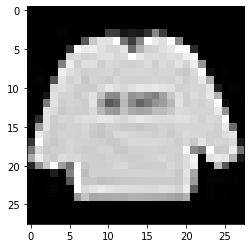

In [6]:
first_image = df_train.iloc[0][1:]

first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

### But we can be efficients and just google it :)

### After a quick google search we know that:

<pre>
label     describsion  
0         t-shirt/top
1         trouser - pants
2         pullover - sweader
3         dress
4         coat
5         sandals
6         shirt
7         sneaker
8         bag
9         ankle boots
</pre>

# Lets add the testing set

In [7]:
df_test = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = df_train['label']

X_train = df_train.drop('label', 1)

In [24]:
y_test = df_test['label']

X_test = df_test.drop('label', 1)

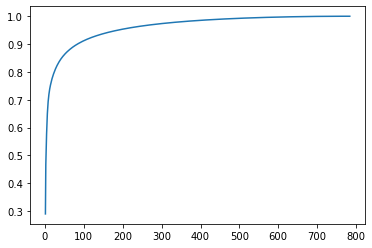

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(cumsum)+1)
plt.plot(x, cumsum)

In [22]:
pca = PCA(n_components=0.88)
X_train_reduced = pca.fit_transform(X_train)
len(pca.singular_values_)

63

In [25]:
pca = PCA(n_components=63)
X_test_reduced = pca.fit_transform(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# clf_predictions = cross_val_predict(clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

# print(confusion_matrix(y_train, clf_predictions))
# print(classification_report(y_train,clf_predictions))
# print(metrics.accuracy_score(y_train, clf_predictions))

In [ ]:
# precision - tp / (tp + fp)
# recall - tp / (tp + fn)
# F1 score - (precision*recall) / (precision+recall)

# RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=None, random_state=0)
rf_scores = cross_val_score(rf_clf, X_train_reduced, y_train, cv = 5)

In [37]:
print(rf_scores)
print(rf_scores.mean())
print(rf_scores.std())

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

#now lets find the optimum K 
mean_score_rate = []
for i in range(1,30):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(knn_clf, X_train_reduced, y_train, cv = 5)
    if knn_scores.std() > 0.001 :
        mean_score_rate.append(0)
    else:
        mean_score_rate.append(knn_scores.mean())
index = mean_score_rate.index(max(err_rate)) + 1
index

KeyboardInterrupt: 

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_scores = cross_val_score(knn_clf, X_train_reduced, y_train, cv = 5)

In [ ]:
print(knn_scores)
print(knn_scores.mean())
print(knn_scores.std())

# ADABOOST

### we can use the random forest from the first modal

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(rf_clf, n_estimators=200, learning_rate=0.5)
ada_scores = cross_val_score(aba_clf, X_train_reduced, y_train, cv = 5)

In [54]:
print(ada_scores)
print(ada_scores.mean())
print(ada_scores.std())

[0.86113333 0.85923333]
0.8601833333333333
0.0009500000000000064


# GRADIENT BOOST 
### (using decision tree)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_clf = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt_scores = cross_val_score(gbrt_clf, X_train_reduced, y_train, cv = 5)

In [ ]:
print(gbrt_scores)
print(gbrt_scores.mean())
print(gbrt_scores.std())

# GAUSSIAN NAIVE BAYES

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_scores = cross_val_score(gnb_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)

In [78]:
print(gnb_scores)
print(gnb_scores.mean())
print(gnb_scores.std())

[0.78008333 0.7755     0.77641667 0.77466667 0.77841667]
0.7770166666666667
0.001977231510077798


In [79]:
gnb_predictions = cross_val_predict(gnb_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, gnb_predictions))
print(classification_report(y_train, gnb_predictions))
print(metrics.accuracy_score(y_train, gnb_predictions))

[[4663    1  119  417   24   31  425    0  320    0]
 [  33 5447  112  264   19    8   66    0   51    0]
 [ 102    0 3844   43  799   32  959    0  220    1]
 [ 405   30   62 4889  181   17  320    0   96    0]
 [  35    3  671  293 3987    4  885    1  121    0]
 [  10    0    1    4    0 4756   79  800  217  133]
 [1067    1  746  228  491   22 3081    0  364    0]
 [   2    0    0    0    0  286   15 5284   15  398]
 [  55    0   49   50   46  152  234  127 5280    7]
 [   2    0    0    0    0  132   18  391   67 5390]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6000
           1       0.99      0.91      0.95      6000
           2       0.69      0.64      0.66      6000
           3       0.79      0.81      0.80      6000
           4       0.72      0.66      0.69      6000
           5       0.87      0.79      0.83      6000
           6       0.51      0.51      0.51      6000
           7       0.80      0.88   